In [137]:
import matplotlib.pyplot as plt
import numpy as np

In [138]:
import os
from PIL import Image

In [139]:
def load_img(file):

    arr = np.array(Image.open(file)).astype(float)
    if len(arr.shape) == 3:
        return arr[:, :, 0]
    else:
        return arr

In [140]:
base1 = r'D:\Dateien\KI_Speicher\SwinSTM_Denoise\Tests\RW_Test\swinir_sr_CL_H128_W8'
base2 = r'D:\Dateien\KI_Speicher\SwinSTM_Denoise\Tests\RW_Test\swinir_sr_classical_patch64_x1_N65_LVL_MM_NP_LargeHS'

In [141]:
def load_pair_gt(num):
    arr1 = load_img(os.path.join(base1, 'indivImgs', f"Image{str(num).zfill(6)}", "GT.png"))
    arr2 = load_img(os.path.join(base2, 'indivImgs', f"Image{str(num).zfill(6)}", "GT.png"))
    print(arr1)
    return arr1, arr2

In [142]:
def load_pair_ns(num):
    arr1 = load_img(os.path.join(base1, 'indivImgs', f"Image{str(num).zfill(6)}", "NS.png"))
    arr2 = load_img(os.path.join(base2, 'indivImgs', f"Image{str(num).zfill(6)}", "NS.png"))
    return arr1, arr2

In [143]:
def load_pair_best(num):
    f1 = os.path.join(base1, 'indivImgs', f"Image{str(num).zfill(6)}", "Predict")
    f2 = os.path.join(base2, 'indivImgs', f"Image{str(num).zfill(6)}", "Predict")
    fi1 = [os.path.join(f1, x) for x in os.listdir(f1)][-1]
    fi2 = [os.path.join(f2, x) for x in os.listdir(f2)][-1]
    arr1 = load_img(fi1)
    arr2 = load_img(fi2)
    return arr1, arr2

In [144]:
def load_pair_corresp(num):
    f1 = os.path.join(base1, 'indivImgs', f"Image{str(num).zfill(6)}", "Predict")
    f2 = os.path.join(base2, 'indivImgs', f"Image{str(num).zfill(6)}", "Predict")
    n1 = [int(x.split('.')[0].split("_")[-1]) for x in os.listdir(f1)]
    n2 = [int(x.split('.')[0].split("_")[-1]) for x in os.listdir(f2)]
    if max(n1) <= max(n2):
        num1 = max(n1)
        num2 = n2[np.argmin(np.abs(np.array(n1) - np.array(n2)))]
    else:
        num2 = max(n2)
        num1 = n1[np.argmin(np.abs(np.array(n1) - np.array(n2)))]

    im1 = os.path.join(f1, f"Image{str(num).zfill(6)}_{num1}.png")
    im2 = os.path.join(f2, f"Image{str(num).zfill(6)}_{num2}.png")

    arr1 = load_img(im1)
    arr2 = load_img(im2)
    return arr1, arr2

In [145]:
dnum = 47

[[170. 169. 168. ... 226. 225. 226.]
 [170. 170. 170. ... 229. 230. 230.]
 [172. 172. 173. ... 232. 234. 235.]
 ...
 [ 32.  35.  40. ... 204. 204. 204.]
 [ 30.  32.  36. ... 204. 204. 204.]
 [ 28.  29.  31. ... 204. 204. 204.]]
[[170. 169. 168. ... 226. 225. 226.]
 [170. 170. 170. ... 229. 230. 230.]
 [172. 172. 173. ... 232. 234. 235.]
 ...
 [ 32.  35.  40. ... 204. 204. 204.]
 [ 30.  32.  36. ... 204. 204. 204.]
 [ 28.  29.  31. ... 204. 204. 204.]]


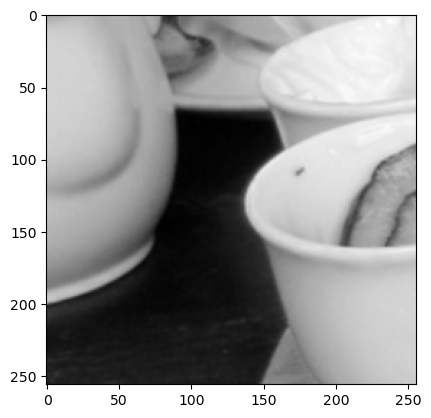

In [146]:
gt, _ = load_pair_gt(dnum)
ns, _ = load_pair_ns(dnum)
print(gt)
plt.imshow(gt, cmap='gray')
plt.show()

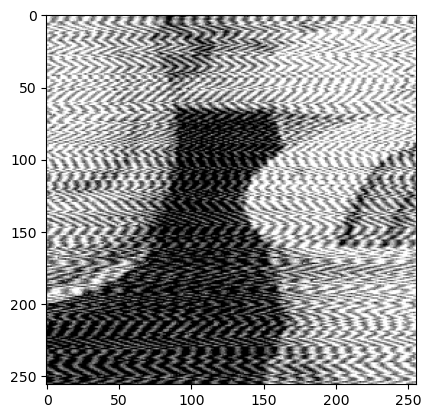

In [147]:
plt.imshow(ns, cmap='gray')

In [148]:
diff = gt - ns

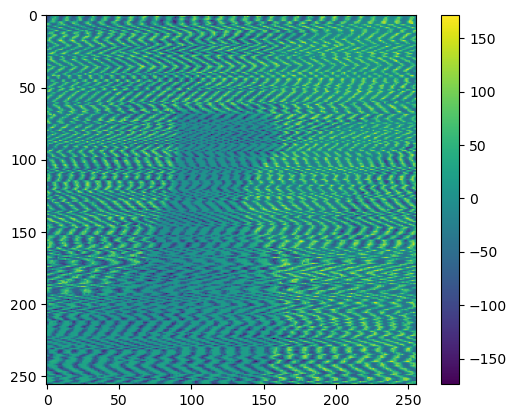

In [149]:
plt.imshow(diff)
plt.colorbar()

In [150]:
b1, b2 = load_pair_best(dnum)

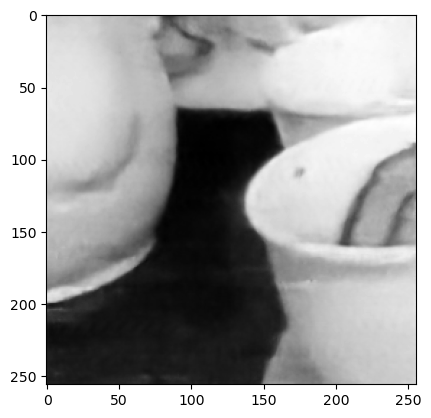

In [151]:
plt.imshow(b1, cmap='gray')

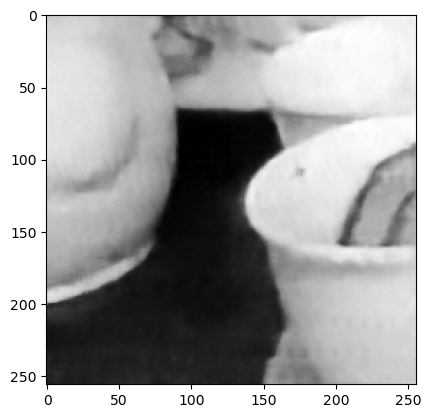

In [152]:
plt.imshow(b2, cmap='gray')


In [153]:
diff = b1 - b2

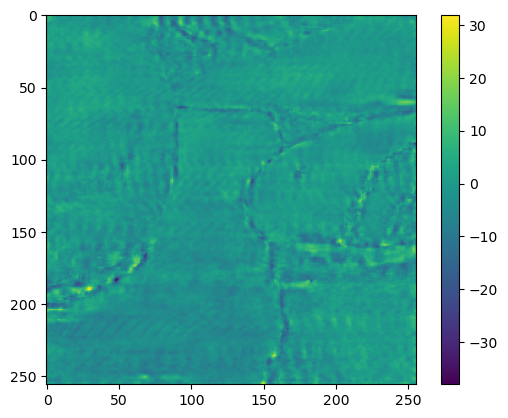

In [154]:
plt.imshow(diff)
plt.colorbar()

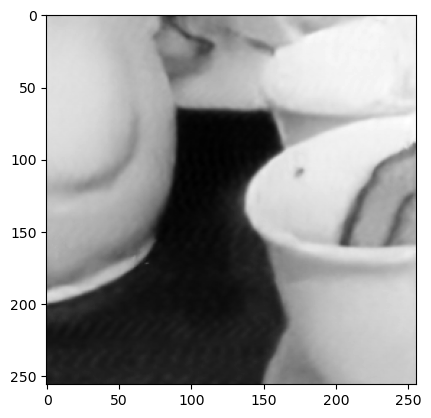

In [155]:
b1, b2 = load_pair_corresp(dnum)
plt.imshow(b1, cmap='gray')


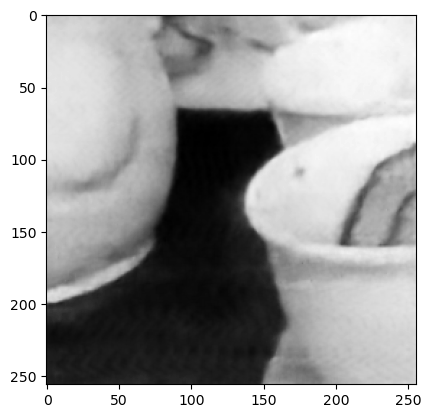

In [156]:
plt.imshow(b2, cmap='gray')


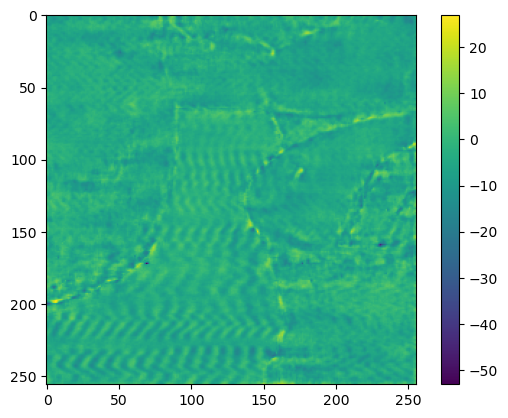

In [157]:
plt.imshow(b2-b1)
plt.colorbar()